<a href="https://colab.research.google.com/github/YoarZeroOne/machine-learning-penyakit-jantung/blob/main/Project1_KecerdasanBuatanMerchingLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melakukan Prediksi Gejala Penyakit Jantung Berdasarkan perbandingan dan gejala yang dialami oleh Pasien

In [ ]:
#Import Library untuk menjalankan proses learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
#Melakukan pengimporan files pada google colabs
from google.colab import files

uploaded =files.upload()

file_name =list(uploaded.keys())[0]
df=pd.read_csv(file_name)

Saving heart.csv to heart (1).csv


In [ ]:
#Menampilkan data csv untuk ditampilkan
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Cek info dan missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
# Malakukan Pengecekan distribusi target
print(df['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


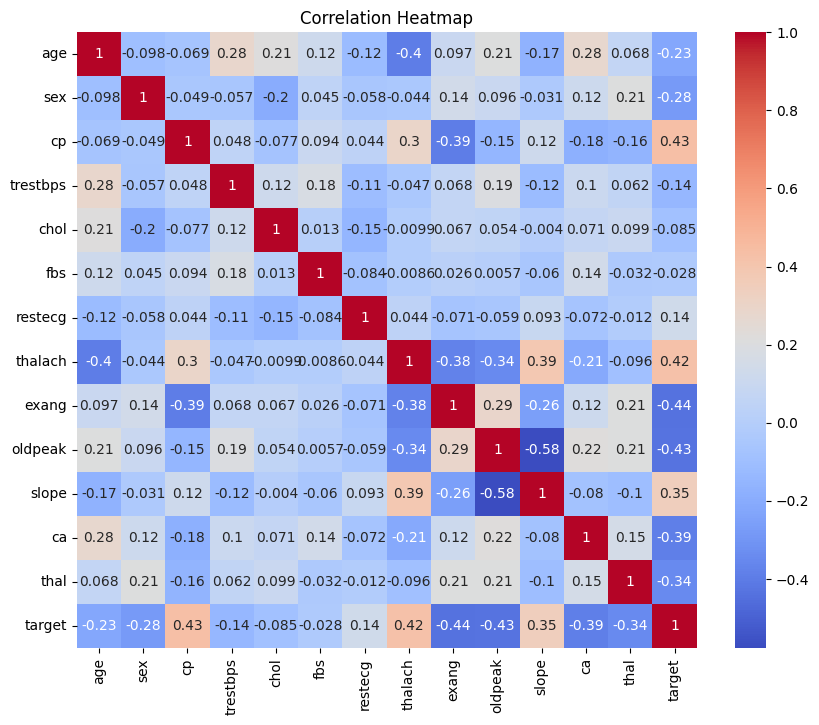

In [ ]:
# Melakukan visualisasi korelasi pada data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Melakukan Split data pada kolom target dengan menghapus kolom awal dan memasukkan kembali pada nilai y
X = df.drop("target", axis=1)
y = df["target"]

X_jalan, X_coba, y_jalan, y_coba = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_jalan, y_jalan)


RandomForestClassifier(random_state=42)

In [ ]:
pd2 = model.predict(X_coba)

In [ ]:
# Melihat Accuracy pada data sheet
print("Accuracy:", accuracy_score(y_coba, y_coba))

Accuracy: 1.0


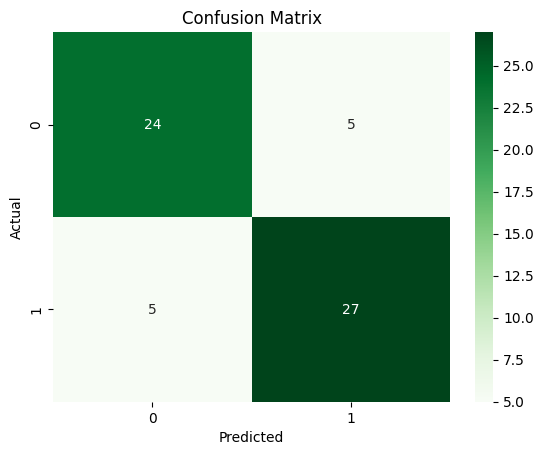

In [ ]:
# Confusion Matrix
df3 = confusion_matrix(y_coba, pd2)
sns.heatmap(df3, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_coba, pd2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



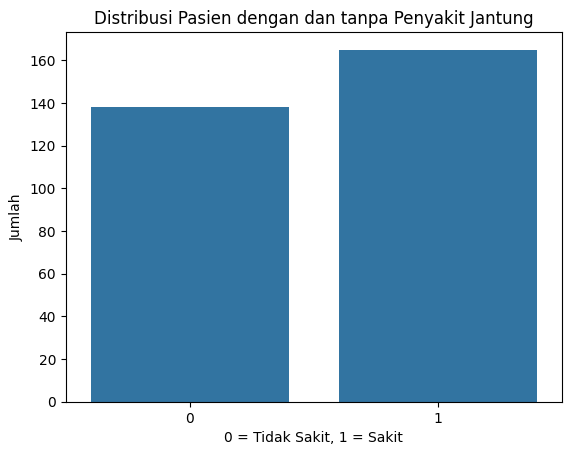

In [ ]:
#Menampilkan grafik Jumlah status pasient penyakit jantung
sns.countplot(x='target', data=df)
plt.title('Distribusi Pasien dengan dan tanpa Penyakit Jantung')
plt.xlabel('0 = Tidak Sakit, 1 = Sakit')
plt.ylabel('Jumlah')
plt.show()


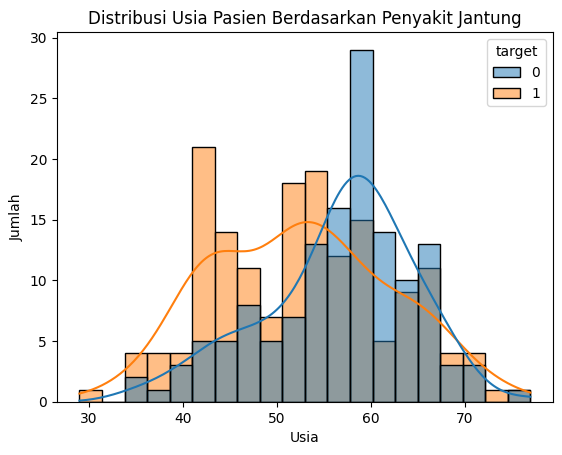

In [ ]:
#Melakukan Perbandingan Usia Pasien berdasarkan status gejala yang dialami
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20)
plt.title('Distribusi Usia Pasien Berdasarkan Penyakit Jantung')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()


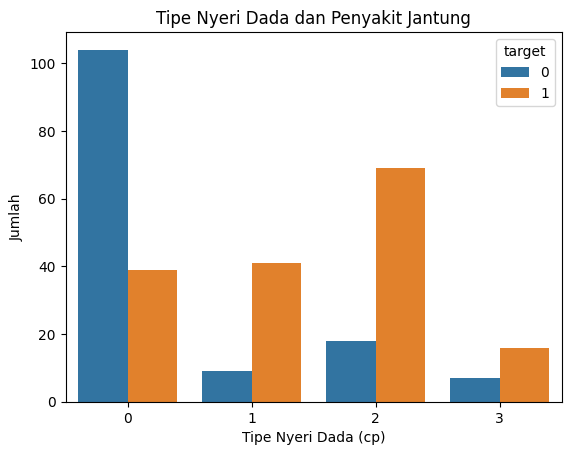

In [ ]:
#Melakukan Perbandingan cp berdasarkan nyeri dada dan penyakit jantung
sns.countplot(x='cp', hue='target', data=df)
plt.title('Tipe Nyeri Dada dan Penyakit Jantung')
plt.xlabel('Tipe Nyeri Dada (cp)')
plt.ylabel('Jumlah')
plt.show()
